In [ ]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplot for visualize
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


In [ ]:
#getting the dataset
#setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",#path of the data
    train = True,#do u want to train the data
    download = True,#do u want to download the data
    transform = torchvision.transforms.ToTensor(),#how do u want to transform the data
    target_transform = None#how do u wantt to transform the target/labels?

)
#setup test data
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download = True,
    transform=ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 20699871.15it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 339283.97it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6132608.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4276545.25it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
#first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#check the shape of our image
print(f"image shape: {image.shape} -> [color ch,h,w]")
print(f"image label:{class_names[label]}")

image shape: torch.Size([1, 28, 28]) -> [color ch,h,w]
image label:Ankle boot


image size:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

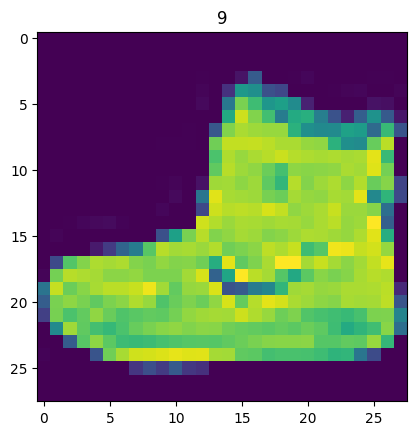

In [ ]:
#visualize our data
image,label = train_data[0]
print(f"image size:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

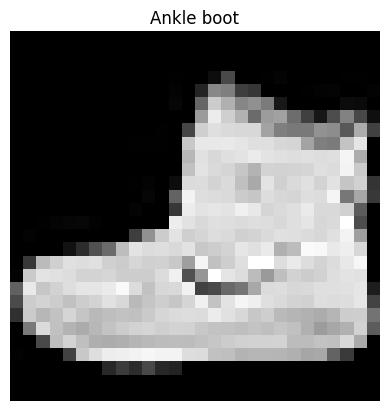

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

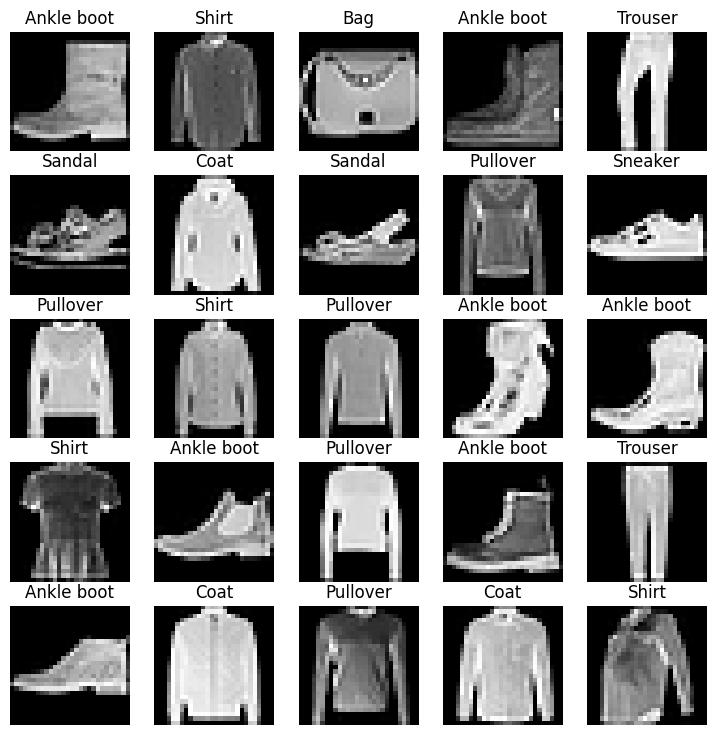

In [ ]:
#plot more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 5,5
for i in range(1,rows*cols+1):
  #print(i)
  random_idx = torch.randint(0,len(train_data),size=[1]).item()#item(): This method extracts the integer value from the tensor and returns it as a standard Python integer.
  #print(random_idx)                                           #a Tensor with 2 elements cannot be converted to Scalar..size=[2]
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


In [ ]:
#setup dataloader
from torch.utils.data import DataLoader
#setup batch size hyperparameter
BATCH_SIZE = 32
#turn datasets into iterables(batchs)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)#shuffle is not necessary for test set as it evaluates...

#lets check what we have done
print(f"dataloader:{train_dataloader,test_dataloader}")
print(f"length of train_dataloader:{len(train_dataloader)} batch of {BATCH_SIZE}")
print(f"length of test_dataloader:{len(test_dataloader)} batch of {BATCH_SIZE}")

dataloader:(<torch.utils.data.dataloader.DataLoader object at 0x7b451fbd09a0>, <torch.utils.data.dataloader.DataLoader object at 0x7b451fbd1f90>)
length of train_dataloader:1875 batch of 32
length of test_dataloader:313 batch of 32


In [ ]:
#lets check what is inside of data loader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

img size:torch.Size([1, 28, 28])
label:1 label size:torch.Size([])


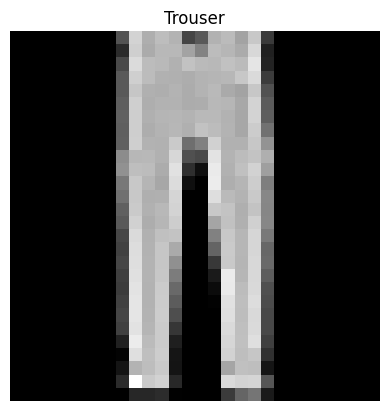

In [ ]:
#visualize a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"img size:{img.shape}")
print(f"label:{label} label size:{label.shape}")

# MODEL 0: build a baseline model

In [ ]:
#create flatten layer
flatten_model = nn.Flatten()
#get a single sample
x = train_features_batch[0]
#flatten the sample
output = flatten_model(x)#perform forward pass
#print what happened
print(f"shape before flatten:{x.shape}")
print(f"shape after flatten:{output.shape}")

shape before flatten:torch.Size([1, 28, 28])
shape after flatten:torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape=int,
               hidden_units=int,
               output_shape=int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
#setup model with parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#dummy test
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
#setup loss,optimizer,evaluation metrices(Accuracy)

import requests
from pathlib import Path
#download helper funnction from pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skip download...")
else:
  print("downloading helper functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open ("helper_functions.py","wb") as f:
    f.write(request.content)

downloading helper functions.py


In [ ]:
#setup accuracy function
from helper_functions import accuracy_fn
#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimmizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
#setup timer function...
from timeit import default_timer as timer
def print_train_time(start=float,
                     end=float,
                     device:torch.device = None):
  total_time = end-start
  print(f"train time on {device}:{total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

train time on cpu:0.000 seconds


5.288500000233398e-05

In [ ]:
#creating training and testing loop
#import tqdm for progress bar
from tqdm.auto import tqdm
#setup the seed and timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
#set the no of epochs
epochs=3
#create a train loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-----")
  #train
  train_loss = 0 #initiate this
  #add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumulate train loss
    optimmizer.zero_grad()
    loss.backward()
    optimmizer.step()
    #print what happened
    if batch % 400 == 0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  #in train loop
  #divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  #testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    #calculate the test acc average per batch
    test_acc /= len(test_dataloader)
  #print what happened
  print(f"\n train loss:{train_loss:.4f} test_loss:{test_loss:.4f} test acc:{test_acc:.2f}")
#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.5904 test_loss:0.5095 test acc:82.04
Epoch:1
-----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.4763 test_loss:0.4799 test acc:83.20
Epoch:2
-----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.4550 test_loss:0.4766 test acc:83.43
train time on cpu:46.364 seconds


In [ ]:
#make prediction and get model_0 results
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()#no need to mention what model it is
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #make prediction
      y_pred = model(X)
      #accumulate the loss and acc per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__ ,
          "model_loss": loss.item(),
          "model_acc": acc}
#calculate model0 results using test dataloader
model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#EXPERIMENT OUR MODEL IN GPU.....

In [ ]:
#device agnoistic code
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#create our model with linearity and non linearity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape = int,
               hidden_units = int,
               output_shape = int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

#create instance for model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,#output after flatten function
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
#setup loss fn,optimizer and evaluation metrics
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimmizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# FUNCTIONIZING TRAINING AND TESTING LOOPS
let's create a function for:

*   training loop = train_step()
*   testing loop = test_step()



In [ ]:
#function for train loop
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc = 0,0
  #put model in train mode
  model.train()
  #add loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    #put data on target device
    X,y = X.to(device),y.to(device)
    #1.forward pass
    y_pred = model(X)
    #2. calculate loss(per batch) and acc
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #3.optimizer zero grad
    optimizer.zero_grad()
    #4.loss backward
    loss.backward()
    #5.optimizer step
    optimizer.step()
  #divide total train loss by length of data loader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss:{train_loss:.5f} | train acc:{train_acc:.2f}% samples")

In [ ]:
#function for test loop
def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               #optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  test_loss,test_acc = 0,0
  #put model in train mode
  model.eval()
  #inference mode
  with torch.inference_mode():
    #add loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
      #put data on target device
      X,y = X.to(device),y.to(device)
      #1.forward pass
      test_pred = model(X)
      #2. calculate loss(per batch) and acc
      test_loss = loss_fn(test_pred,y)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
      #3.optimizer zero grad
      #optimizer.zero_grad()
      #4.loss backward
      #loss.backward()
      #5.optimizer step
      #optimizer.step()
    #divide total train loss by length of data loader
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss:{test_loss:.5f} | test acc:{test_acc:.2f}% samples")

In [ ]:
torch.manual_seed(42)
#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
#set epoch
epoch = 3
#create a optim and eval loop on train step and test step
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimmizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            #optimizer = optimmizer,
            accuracy_fn = accuracy_fn,
            device = device)#optim not necessary coz..its evaluating
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
------
train loss:1.09199 | train acc:61.34% samples
test loss:0.00321 | test acc:65.00% samples
epoch:1
------
train loss:0.78101 | train acc:71.93% samples
test loss:0.00229 | test acc:73.91% samples
epoch:2
------
train loss:0.67027 | train acc:75.94% samples
test loss:0.00229 | test acc:75.02% samples
train time on cpu:38.298 seconds


Note: the whole optimizer function in test step were taken....as error occured as optimizer not necessary for the test step....[error occuring at the backend]

In [ ]:
total_train_time_model_0

46.364141754

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#make prediction and get model_1 results
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()#no need to mention what model it is
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #device agnoistic code
      X,y = X.to(device),y.to(device)
      #make prediction
      y_pred = model(X)
      #accumulate the loss and acc per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__ ,
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
#get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results
#it may get an device error...that time do device agnoistic code in above eval model

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

# Model 2 : Building a CNN Model...

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,#apply trick here
                  out_features=output_shape)
    )
  def forward (self,x):
    x = self.conv_block_1(x)
    #print(f"output shape of conv block_1:{x.shape}")
    x = self.conv_block_2(x)
    #print(f"output shape of conv block_2:{x.shape}")
    x = self.classifier(x)
    #print(f"output shape of classifier:{x.shape}")
    return x

In [ ]:
#instance model
torch.manual_seed(42)
Model_2 = FashionMNISTModelV2(input_shape = 1,#color channels
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [ ]:
#create an a random img tensor pass it through the model_2
random_image_tensor = torch.rand(size=(1,28,28))
random_image_tensor.shape

Model_2(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

In [ ]:
#stepping through nn.Conv2d()
torch.manual_seed(42)
#create a barch of iimages
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape:{images.shape}")
print(f"single image shape:{test_image.shape}")
print(f"test image:{test_image}")

image batch shape:torch.Size([32, 3, 64, 64])
single image shape:torch.Size([3, 64, 64])
test image:tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.930

In [ ]:
#create a single Conv2d layer
torch.manual_seed(42)
Conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
#pass the data through the convolutional layer
Conv_output = Conv_layer(test_image)
Conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
#stepping through maxpool2d()
#print out original image shape without unsequeeze
print(f"test image original shape:{test_image.shape}")
print(f"test image with unsequeeze dim:{test_image.unsqueeze(0).shape}")
#create a sample maxpllo2d layer:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the data throught conv layer
test_image_through_Conv_layer = Conv_output.unsqueeze(0)
print(f"shape after going through Conv layer:{test_image_through_Conv_layer.shape}")

#pass the data through conv and maxpool layer
test_image_through_Conv_layer_and_maxpool = max_pool_layer(test_image_through_Conv_layer)
print(f"shape after going through Conv layer and maxpool:{test_image_through_Conv_layer_and_maxpool.shape}")

#NOTE:the max pool layer compress/reduces  the dimension

test image original shape:torch.Size([3, 64, 64])
test image with unsequeeze dim:torch.Size([1, 3, 64, 64])
shape after going through Conv layer:torch.Size([1, 10, 62, 62])
shape after going through Conv layer and maxpool:torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# create a random tensor with a similar no of dimensions to our imge
random_tensor = torch.rand(size=(1,1,2,2))
print(f"random tensor = {random_tensor}")
print(f"random tensor shape = {random_tensor.shape}")

#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"max pool tensor:{max_pool_tensor}")
print(f"max pool tensor shape:{max_pool_tensor.shape}")

random tensor = tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
random tensor shape = torch.Size([1, 1, 2, 2])
max pool tensor:tensor([[[[0.9593]]]])
max pool tensor shape:torch.Size([1, 1, 1, 1])


In [ ]:
#setup loss fn,optim,eval metrics for model 2
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model_2.parameters(),lr=0.1)

In [ ]:
#train and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_model_2 = timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n------")
  train_step(model=Model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device=device)
  test_step(model=Model_2,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_model_2,
                                            end=train_time_end_on_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
------
train loss:0.59518 | train acc:78.38% samples
test loss:0.00209 | test acc:85.99% samples
epoch:1
------
train loss:0.36536 | train acc:86.90% samples
test loss:0.00174 | test acc:86.91% samples
epoch:2
------
train loss:0.32588 | train acc:88.13% samples
test loss:0.00169 | test acc:88.07% samples
train time on cpu:171.358 seconds


In [ ]:
#model_2 results
model_2_results = eval_model(model = Model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
#compare the model results
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,46.364142
1,FashionMNISTModelV1,0.685001,75.019968,38.297740
2,FashionMNISTModelV2,0.327190,88.069089,171.358307


Text(0, 0.5, 'model')

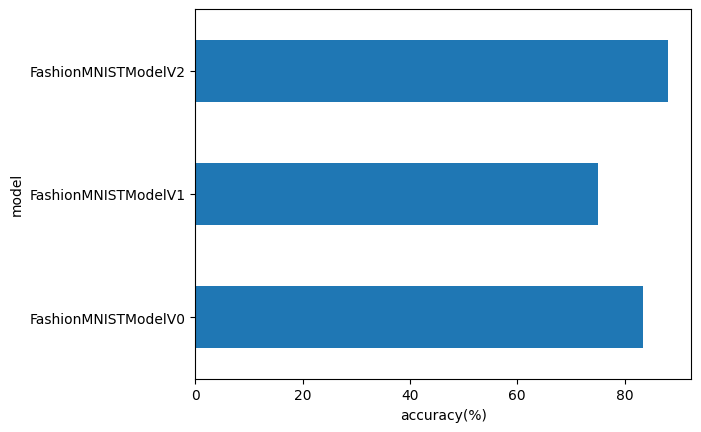

In [ ]:
#visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [ ]:
#make and evaluate random predictions with best model....
#function for prediction
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare a sample(add batch dim and target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)
      #forward pass(model output raw logits)
      pred_logit = model(sample)
      #get pred prob(logits->pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      #get pred prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  #stack the pred_probs to turn list to tensors
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

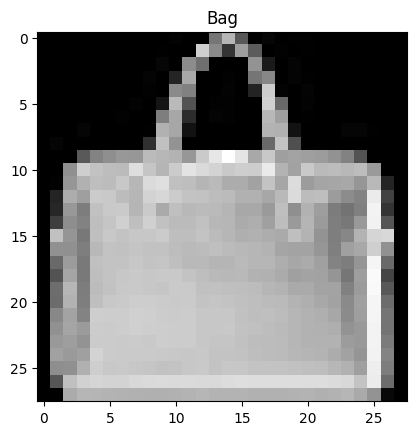

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make predictions
pred_probs = make_predictions(model=Model_2,
                             data=test_samples)
pred_probs[:2]
#convert pred probs to layers
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 9, 6, 1, 5, 4, 5, 9, 6])

In [ ]:
test_labels

[8, 9, 2, 1, 5, 6, 5, 9, 6]

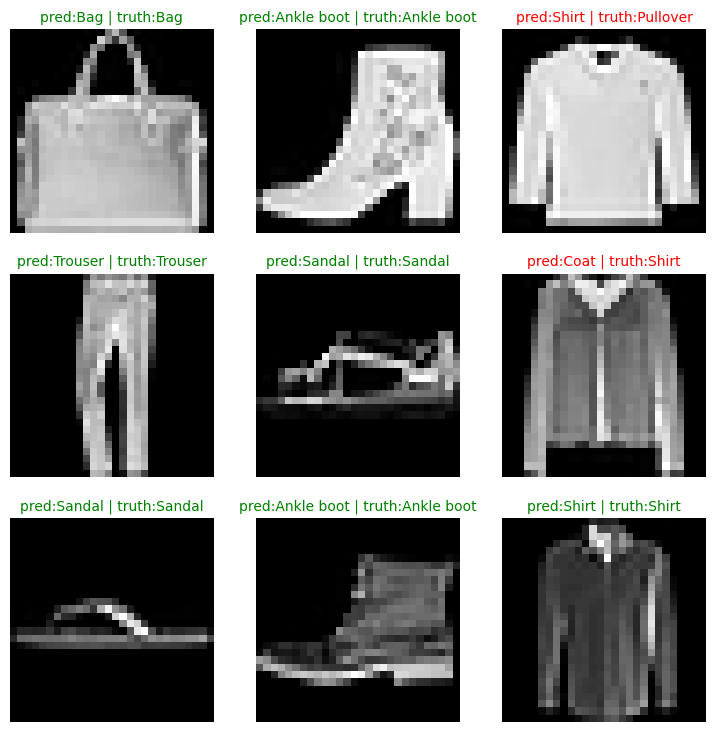

In [ ]:
#plot the predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  #find predictions(eg:sandels)
  pred_label = class_names[pred_classes[i]]
  #get truth label(in text form)
  truth_label = class_names[test_labels[i]]
  #create a title for the plot
  title_text = f"pred:{pred_label} | truth:{truth_label}"
  #check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis("off")

In [ ]:
##### making confusion matrix for further prediction evaluation...

In [ ]:
#1.make prediction with trained model
from tqdm.auto import tqdm
y_preds=[]
Model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="make predictions...."):
    #send the data and targets to target device
    X,y = X.to(device), y.to(device)
    #do the forward pass
    y_logit = Model_2(X)
    #turn predictions from logits->pred probs->pred labels
    y_pred = torch.softmax(y_logit,dim=0).argmax(dim=1)
    #put prediction on cpu for evaluation
    y_preds.append(y_pred.cpu())
#concatenate list of predictions into tensors
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

make predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

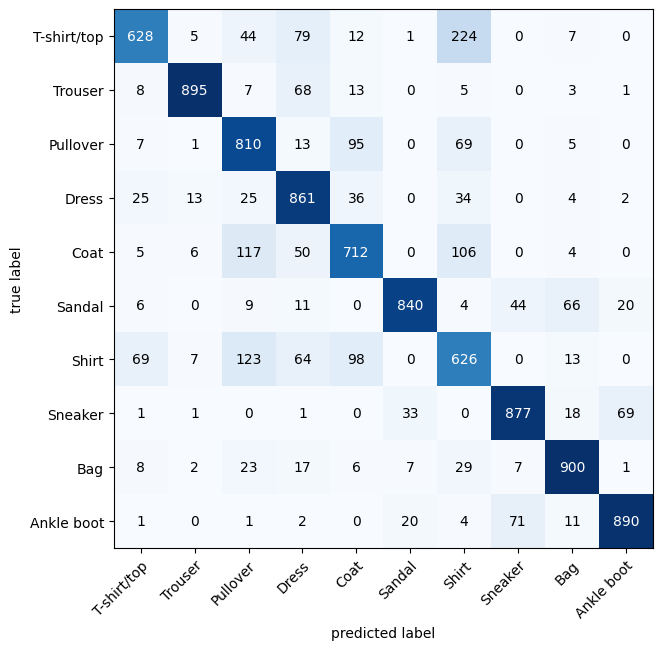

In [ ]:
#2. setup confusion instance and compare prediction to target
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task = "multiclass",num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. plot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), #matplot works with numpy
    class_names = class_names,
    figsize = (10,7)
)

In [ ]:
#save and load model
from pathlib import Path
#create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok=True)

#create model save
MODEL_NAME = "Computer vision.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#save the model dict state
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=Model_2.state_dict(),
           f = MODEL_SAVE_PATH)

#loading
#create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))
#load in save dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
#send the model to target device
loaded_model_2.to(device)

Saving model to:models/Computer vision.pth


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)